# Prueba técnica: Data pipeline

Desarrolla: Oropeza Castañeda Angel Eduardo
---
Descripción:
Desarrollar un pipeline de análisis de datos utilizando los datos abiertos de la Ciudad de México correspondientes a las ubicaciones de las unidades del metrobús para que pueda ser consultado mediante un API REST filtrando por unidad o por alcaldía. 


In [ ]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline            

Contexto: el conjunto de datos con el que trabajaremos, describe la ubicación de las unidades de Metrobús en tiempo real en la última hora.

In [ ]:
DatosMB = pd.read_csv("prueba_fetchdata_metrobus.csv")
# Imprimimos una pequeña muestra de los datos, para validar su correcta importación
DatosMB.head()

,id,date_updated,vehicle_id,vehicle_label,vehicle_current_status,position_latitude,position_longitude,geographic_point,position_speed,position_odometer,trip_schedule_relationship,trip_id,trip_start_date,trip_route_id
0,0,2021-01-27 18:00:02,170,112,2,19.317499,-99.187798,"19.3174991608,-99.1877975464",16,231,2,NaN,NaN,367.0
1,1,2021-01-27 18:00:02,177,119,1,19.292601,-99.177498,"19.2926006317,-99.1774978638",13,0,0,9732304.0,20200428.0,367.0
2,2,2021-01-27 18:00:02,1286,219,2,19.450100,-99.110100,"19.4500999451,-99.1100997925",5,0,0,9678929.0,20200428.0,161.0
3,3,2021-01-27 18:00:02,1302,235,1,19.389200,-99.059799,"19.3892002106,-99.0597991943",4,0,0,9738091.0,20200428.0,301.0
4,4,2021-01-27 18:00:02,361,303,2,19.382601,-99.061302,"19.3826007843,-99.0613021851",0,454,0,9738145.0,20200428.0,301.0


## Descripción de la estructura de los datos.
1) Forma (dimensiones) del Dataframe

In [ ]:
DatosMB.shape

(207, 14)

Podemos observar un dataframe descrito por 14 columnas y 207 registros.

2) Tipos de datos (columnares)

In [ ]:
DatosMB.dtypes

id                              int64
date_updated                   object
vehicle_id                      int64
vehicle_label                   int64
vehicle_current_status          int64
position_latitude             float64
position_longitude            float64
geographic_point               object
position_speed                  int64
position_odometer               int64
trip_schedule_relationship      int64
trip_id                       float64
trip_start_date               float64
trip_route_id                 float64
dtype: object

3) Descripción de columnas de tipo numérico

In [ ]:
DatosMB.describe()

,id,vehicle_id,vehicle_label,vehicle_current_status,position_latitude,position_longitude,position_speed,position_odometer,trip_schedule_relationship,trip_id,trip_start_date,trip_route_id
count,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,1.720000e+02,172.0,180.000000
mean,103.000000,1109.507246,909.26570,1.710145,19.249019,-99.176083,4.492754,243.289855,0.338164,9.718865e+06,20200428.0,196.533333
std,59.899917,1711.173074,619.48861,0.454795,1.906558,0.428806,4.481753,374.391977,0.751466,3.115224e+04,0.0,122.958521
min,0.000000,1.000000,112.00000,1.000000,0.000000,-103.488998,0.000000,0.000000,0.000000,9.670725e+06,20200428.0,1.000000
25%,51.500000,500.500000,511.50000,1.000000,19.398000,-99.164101,0.000000,0.000000,0.000000,9.684345e+06,20200428.0,61.000000
50%,103.000000,789.000000,759.00000,2.000000,19.432100,-99.142998,4.000000,59.000000,0.000000,9.736082e+06,20200428.0,241.000000
75%,154.500000,1162.000000,1046.50000,2.000000,19.479751,-99.113899,7.500000,373.000000,0.000000,9.740058e+06,20200428.0,301.000000
max,206.000000,10023.000000,2376.00000,2.000000,19.527100,-99.047302,16.000000,1845.000000,2.000000,9.755750e+06,20200428.0,367.000000


4) Distribución de datos numéricos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


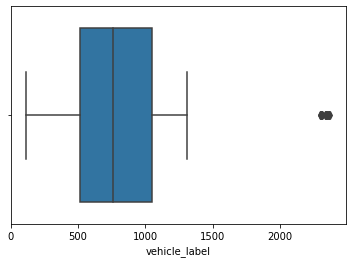

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


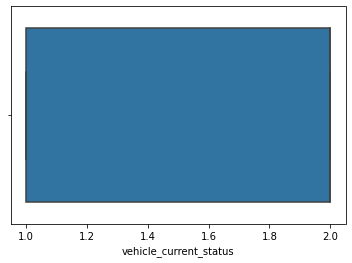

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


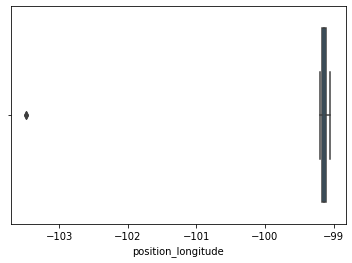

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


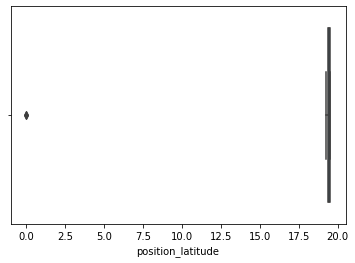

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


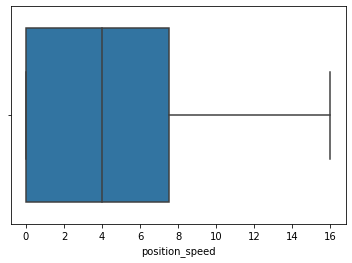

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


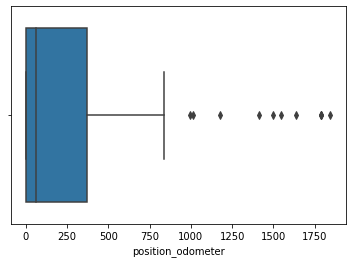

In [ ]:
ColumnasNumericas = ['vehicle_label', 'vehicle_current_status', 'position_longitude','position_latitude', 'position_speed', 'position_odometer']
for col in ColumnasNumericas:
  sns.boxplot(col, data=DatosMB)
  plt.show()

5) Distribución de variables categóricas

In [ ]:
DatosMB.describe(include='object')

,date_updated,geographic_point
count,207,207
unique,1,201
top,2021-01-27 18:00:02,"19.3910007477,-99.0476989746"
freq,207,2


## Identificación de datos faltantes.

Con la finalidad de conocer de mejor manera nuestro conjunto de datos, revisamos si este cuenta con valores nulos en sus registros.

In [ ]:
DatosMB.isnull().sum()

id                             0
date_updated                   0
vehicle_id                     0
vehicle_label                  0
vehicle_current_status         0
position_latitude              0
position_longitude             0
geographic_point               0
position_speed                 0
position_odometer              0
trip_schedule_relationship     0
trip_id                       35
trip_start_date               35
trip_route_id                 27
dtype: int64

Podemos complementar la información con la función `info()`

In [ ]:
DatosMB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          207 non-null    int64  
 1   date_updated                207 non-null    object 
 2   vehicle_id                  207 non-null    int64  
 3   vehicle_label               207 non-null    int64  
 4   vehicle_current_status      207 non-null    int64  
 5   position_latitude           207 non-null    float64
 6   position_longitude          207 non-null    float64
 7   geographic_point            207 non-null    object 
 8   position_speed              207 non-null    int64  
 9   position_odometer           207 non-null    int64  
 10  trip_schedule_relationship  207 non-null    int64  
 11  trip_id                     172 non-null    float64
 12  trip_start_date             172 non-null    float64
 13  trip_route_id               180 non

# ALCALDÍAS

In [ ]:
DatosAlcaldias = pd.read_csv("alcaldias.csv")
DatosAlcaldias.head()

,id,nomgeo,cve_mun,cve_ent,cvegeo,geo_point_2d,geo_shape,municipio
0,0,Milpa Alta,9,9,9009,"19.1394565999,-99.0510954218","{""type"": ""Polygon"", ""coordinates"": [[[-98.9972...",9
1,1,Benito Juárez,14,9,9014,"19.3806424162,-99.1611346584","{""type"": ""Polygon"", ""coordinates"": [[[-99.1367...",14
2,2,Gustavo A. Madero,5,9,9005,"19.5040652077,-99.1158642087","{""type"": ""Polygon"", ""coordinates"": [[[-99.1185...",5
3,3,Coyoacán,3,9,9003,"19.3266672536,-99.1503763525","{""type"": ""Polygon"", ""coordinates"": [[[-99.1392...",3
4,4,Miguel Hidalgo,16,9,9016,"19.4280623649,-99.2045669144","{""type"": ""Polygon"", ""coordinates"": [[[-99.1905...",16


In [ ]:
pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Milpa Alta
Benito Juárez
Gustavo A. Madero
Coyoacán
Miguel Hidalgo
La Magdalena Contreras
Tláhuac
Azcapotzalco
Iztacalco
Álvaro Obregón
Xochimilco
Venustiano Carranza
Tlalpan
Cuajimalpa de Morelos
Cuauhtémoc
Iztapalapa


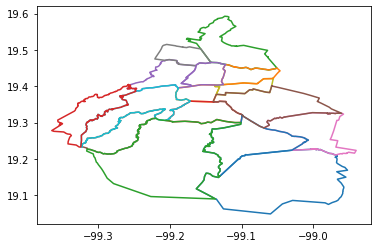

In [ ]:
import json
plt.figure()
for i in range(len(DatosAlcaldias)):
  geo_shape = json.loads(DatosAlcaldias.loc[i, "geo_shape"])
  print(DatosAlcaldias.loc[i, "nomgeo"])
  coord = geo_shape["coordinates"][0]
  coord.append(coord[0]) 

  xs, ys = zip(*coord)
  
  plt.plot(xs,ys) 
  
plt.show()


In [ ]:
from shapely.geometry import Point, Polygon

Alcaldias = {}

poligonos = []

# Los datos en el dataframe están representados como (Y,X) = (Latitude,Longitude)
p1 = Point(-99.02279980613189, 19.352393093274056)


for i in range(len(DatosAlcaldias)):
  geo_shape = json.loads(DatosAlcaldias.loc[i, "geo_shape"])
  coords = geo_shape["coordinates"][0]
  coords.append(coord[0]) # Cerrar el polígono

  AlcaldiaNombre = DatosAlcaldias.loc[i, "nomgeo"]
  Alcaldias[AlcaldiaNombre] = Polygon([tuple(coord) for coord in coords])

print(Alcaldias)

{'Milpa Alta': <shapely.geometry.polygon.Polygon object at 0x7fb60a4c7a50>, 'Benito Juárez': <shapely.geometry.polygon.Polygon object at 0x7fb60a4c7190>, 'Gustavo A. Madero': <shapely.geometry.polygon.Polygon object at 0x7fb60a4b8610>, 'Coyoacán': <shapely.geometry.polygon.Polygon object at 0x7fb609ceeb50>, 'Miguel Hidalgo': <shapely.geometry.polygon.Polygon object at 0x7fb60a4b4650>, 'La Magdalena Contreras': <shapely.geometry.polygon.Polygon object at 0x7fb60a4b8510>, 'Tláhuac': <shapely.geometry.polygon.Polygon object at 0x7fb609cbaf10>, 'Azcapotzalco': <shapely.geometry.polygon.Polygon object at 0x7fb60b2a9e90>, 'Iztacalco': <shapely.geometry.polygon.Polygon object at 0x7fb60bb406d0>, 'Álvaro Obregón': <shapely.geometry.polygon.Polygon object at 0x7fb609cca410>, 'Xochimilco': <shapely.geometry.polygon.Polygon object at 0x7fb609cca450>, 'Venustiano Carranza': <shapely.geometry.polygon.Polygon object at 0x7fb609cca490>, 'Tlalpan': <shapely.geometry.polygon.Polygon object at 0x7fb609c

In [ ]:
def getAlcaldia(punto, alcaldias):
  for alcaldia in alcaldias:
    if alcaldias[alcaldia].contains(punto):
      return alcaldia
  return ""

print(getAlcaldia(p1, Alcaldias))

Iztapalapa


In [ ]:
alcaldias_col = []
for i in range(len(DatosMB)):
  latitude, longitude = DatosMB.loc[i, "position_latitude"], DatosMB.loc[i, "position_longitude"]
  ubicacion = Point(longitude, latitude)
  alcaldias_col.append(getAlcaldia(ubicacion, Alcaldias))

DatosMB_2 = DatosMB.assign(alcaldia=alcaldias_col) # Añadimos la columna con la Alcaldia
DatosMB_2.head()

,id,date_updated,vehicle_id,vehicle_label,vehicle_current_status,position_latitude,position_longitude,geographic_point,position_speed,position_odometer,trip_schedule_relationship,trip_id,trip_start_date,trip_route_id,alcaldia
0,0,2021-01-27 18:00:02,170,112,2,19.317499,-99.187798,"19.3174991608,-99.1877975464",16,231,2,NaN,NaN,367.0,Coyoacán
1,1,2021-01-27 18:00:02,177,119,1,19.292601,-99.177498,"19.2926006317,-99.1774978638",13,0,0,9732304.0,20200428.0,367.0,Tlalpan
2,2,2021-01-27 18:00:02,1286,219,2,19.450100,-99.110100,"19.4500999451,-99.1100997925",5,0,0,9678929.0,20200428.0,161.0,Venustiano Carranza
3,3,2021-01-27 18:00:02,1302,235,1,19.389200,-99.059799,"19.3892002106,-99.0597991943",4,0,0,9738091.0,20200428.0,301.0,Iztapalapa
4,4,2021-01-27 18:00:02,361,303,2,19.382601,-99.061302,"19.3826007843,-99.0613021851",0,454,0,9738145.0,20200428.0,301.0,Iztapalapa


Revisamos los posibles valores de la columna `vehicle_current_status`:

In [ ]:
print(DatosMB_2['vehicle_current_status'].unique())

[2 1]


Debido a que los datos no tienen descripción en el sitio de la CDMX de datos abiertos; asumamos los siguientes casos para la columna `vehicle_current_status`:
* 1 = NO DISPONIBLE
* 2 = DISPONIBLE

Adicionalmente, podemos ver que tenemos dos únicos valores en todos los registros, por lo que el tipo de dato correcto para la columna, debería ser un booleano: 0/1, por lo que aplicamos la transformación para admitir únicamente estos valores.

In [ ]:
DatosMB_2["vehicle_current_status"] = DatosMB_2["vehicle_current_status"].replace({2:1, 1:0})
DatosMB_2

,id,date_updated,vehicle_id,vehicle_label,vehicle_current_status,position_latitude,position_longitude,geographic_point,position_speed,position_odometer,trip_schedule_relationship,trip_id,trip_start_date,trip_route_id,alcaldia
0,0,2021-01-27 18:00:02,170,112,1,19.317499,-99.187798,"19.3174991608,-99.1877975464",16,231,2,NaN,NaN,367.0,Coyoacán
1,1,2021-01-27 18:00:02,177,119,0,19.292601,-99.177498,"19.2926006317,-99.1774978638",13,0,0,9732304.0,20200428.0,367.0,Tlalpan
2,2,2021-01-27 18:00:02,1286,219,1,19.450100,-99.110100,"19.4500999451,-99.1100997925",5,0,0,9678929.0,20200428.0,161.0,Venustiano Carranza
3,3,2021-01-27 18:00:02,1302,235,0,19.389200,-99.059799,"19.3892002106,-99.0597991943",4,0,0,9738091.0,20200428.0,301.0,Iztapalapa
4,4,2021-01-27 18:00:02,361,303,1,19.382601,-99.061302,"19.3826007843,-99.0613021851",0,454,0,9738145.0,20200428.0,301.0,Iztapalapa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,2021-01-27 18:00:02,1238,2347,1,19.403500,-99.169899,"19.4034996033,-99.1698989868",7,0,0,9736129.0,20200428.0,301.0,Cuauhtémoc
203,203,2021-01-27 18:00:02,1024,2351,1,19.390900,-99.047302,"19.3908996582,-99.0473022461",0,0,0,9737808.0,20200428.0,301.0,Iztapalapa
204,204,2021-01-27 18:00:02,10002,2358,1,19.397301,-99.104599,"19.3973007202,-99.104598999",7,0,0,9737246.0,20200428.0,301.0,Iztacalco
205,205,2021-01-27 18:00:02,1232,2363,1,19.393900,-99.137497,"19.3938999176,-99.1374969482",14,0,0,9735896.0,20200428.0,301.0,Benito Juárez


Validamos que los tipos de valores en la columna `Alcaldia` coincida con los permitidos

In [ ]:
print(DatosMB_2['alcaldia'].unique())

['Coyoacán' 'Tlalpan' 'Venustiano Carranza' 'Iztapalapa'
 'Gustavo A. Madero' 'Cuauhtémoc' 'Benito Juárez' 'Azcapotzalco'
 'Miguel Hidalgo' 'Iztacalco' '' 'Álvaro Obregón']


Finalmente, nuestro dataframe a almacenar, queda de la siguiente manera:

In [ ]:
DatosMB_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          207 non-null    int64  
 1   date_updated                207 non-null    object 
 2   vehicle_id                  207 non-null    int64  
 3   vehicle_label               207 non-null    int64  
 4   vehicle_current_status      207 non-null    int64  
 5   position_latitude           207 non-null    float64
 6   position_longitude          207 non-null    float64
 7   geographic_point            207 non-null    object 
 8   position_speed              207 non-null    int64  
 9   position_odometer           207 non-null    int64  
 10  trip_schedule_relationship  207 non-null    int64  
 11  trip_id                     172 non-null    float64
 12  trip_start_date             172 non-null    float64
 13  trip_route_id               180 non

TODO: trip_start_date debe ser una fecha ((no debe ser float), trip_id un identificador (no debe ser float), lo mismo con trip_route_id

In [ ]:
# COLUMN CAST FROM FLOAT TO INTEGER
DatosMB_2['trip_route_id'] = DatosMB_2['trip_route_id'].fillna(0)
DatosMB_2['trip_id'] = DatosMB_2['trip_id'].fillna(0)
DatosMB_2 = DatosMB_2.astype({'trip_route_id': 'int64', 'trip_id': 'int64'})

In [ ]:
# COLUMN CAST FROM FLOAT TO TIME
DatosMB_2['trip_start_date'] = pd.to_datetime(DatosMB_2['trip_start_date'], format='%Y%m%d')
DatosMB_2.head(5)

,id,date_updated,vehicle_id,vehicle_label,vehicle_current_status,position_latitude,position_longitude,geographic_point,position_speed,position_odometer,trip_schedule_relationship,trip_id,trip_start_date,trip_route_id,alcaldia
0,0,2021-01-27 18:00:02,170,112,1,19.317499,-99.187798,"19.3174991608,-99.1877975464",16,231,2,0,NaT,367,Coyoacán
1,1,2021-01-27 18:00:02,177,119,0,19.292601,-99.177498,"19.2926006317,-99.1774978638",13,0,0,9732304,2020-04-28,367,Tlalpan
2,2,2021-01-27 18:00:02,1286,219,1,19.450100,-99.110100,"19.4500999451,-99.1100997925",5,0,0,9678929,2020-04-28,161,Venustiano Carranza
3,3,2021-01-27 18:00:02,1302,235,0,19.389200,-99.059799,"19.3892002106,-99.0597991943",4,0,0,9738091,2020-04-28,301,Iztapalapa
4,4,2021-01-27 18:00:02,361,303,1,19.382601,-99.061302,"19.3826007843,-99.0613021851",0,454,0,9738145,2020-04-28,301,Iztapalapa


In [ ]:
DatosMB_2.to_csv("etl.csv")